In [43]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

## 19~23년 구별 범죄수

In [44]:
# 파일 호출
crime_df = pd.read_csv('./서울시_자치구별_5대범죄 현황.csv', encoding='utf-8')

# 여백 처리
crime_df = crime_df.drop(labels=crime_df.index[:2])
crime_df = crime_df.drop(labels=crime_df.columns[0], axis=1)

# 전처리과정
crime_df = crime_df.set_index('자치구별(2)')  # 인덱스 설정
crime_df = crime_df.rename_axis(mapper='자치구',axis=0)  # 인덱스명 설정
crime_df = crime_df.rename_axis(mapper='연도별 범죄수',axis=1)  # 컬럼명 설정
crime_df = crime_df.astype(int)  # 데이터타입 변경
crime_df = crime_df.sort_index()
crime_df.info()


crime_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2019    25 non-null     int32
 1   2020    25 non-null     int32
 2   2021    25 non-null     int32
 3   2022    25 non-null     int32
dtypes: int32(4)
memory usage: 600.0+ bytes


연도별 범죄수,2019,2020,2021,2022
자치구,,,,
강남구,7304,7356,6146,6947
강동구,4014,3788,3458,3711
강북구,3838,2770,2301,2832
강서구,4924,4415,3896,4663
관악구,5328,5261,4444,4879


## 19~22년 구별 인구수

In [45]:
popul_df = pd.read_csv('서울시_자치구별_인구수.csv', encoding='cp949')
popul_df = popul_df.set_index('동별(2)')
popul_df = popul_df.rename_axis(mapper='자치구',axis=0)
popul_df = popul_df.rename_axis(mapper='연도별 인구수',axis=1)
popul_df = popul_df.sort_index()
popul_df.info()


popul_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2019    25 non-null     int64
 1   2020    25 non-null     int64
 2   2021    25 non-null     int64
 3   2022    25 non-null     int64
dtypes: int64(4)
memory usage: 1000.0+ bytes


연도별 인구수,2019,2020,2021,2022
자치구,,,,
강남구,550209,544055,537800,534103
강동구,440390,463998,466472,464037
강북구,317695,311569,302563,297702
강서구,598273,585901,579768,574638
관악구,517334,509803,499449,501226


## 19~23년 구별 연도별 범죄율

In [46]:
crime_rate_df = pd.DataFrame(index=crime_df.index)
for i in crime_df.columns:
    crime_rate_df[i] = crime_df[i] / popul_df[i] * 100
    

crime_rate_df = crime_rate_df.rename_axis(mapper='연도별 범죄율(%)',axis=1)
crime_rate_df.head()

연도별 범죄율(%),2019,2020,2021,2022
자치구,,,,
강남구,1.327496,1.352069,1.142804,1.300685
강동구,0.911465,0.816383,0.741309,0.799721
강북구,1.208077,0.889049,0.760503,0.951287
강서구,0.823036,0.753540,0.671993,0.811467
관악구,1.029896,1.031967,0.889781,0.973413


## 19~23년 연도별 범죄율 그래프

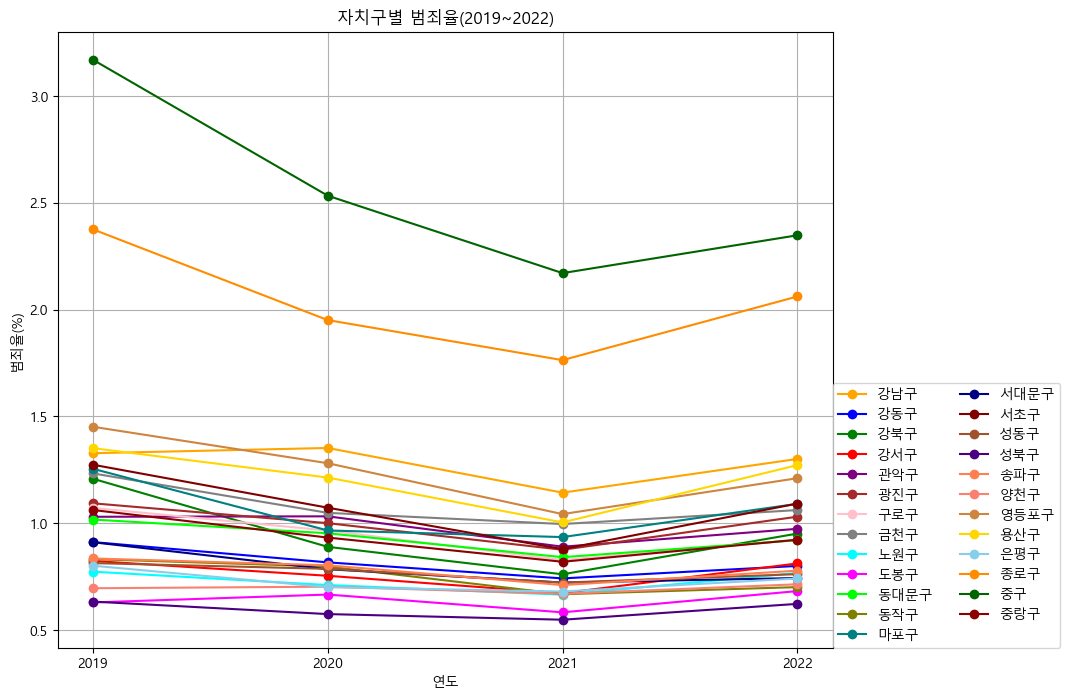

In [47]:
colors = ['orange', 'blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta',
          'lime', 'olive', 'teal', 'navy', 'maroon', 'sienna', 'indigo', 'coral', 'salmon',
          'peru', 'gold', 'skyblue', 'darkorange', 'darkgreen', 'darkred']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))

# DF의 인덱스와 값으로 라인그래프
for index, row in crime_rate_df.iterrows():
    plt.plot(crime_rate_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 범죄율(2019~2022)')
plt.xlabel('연도')
plt.ylabel('범죄율(%)')
plt.legend(loc=(1,0), ncol=2)
plt.grid(True)

plt.show()

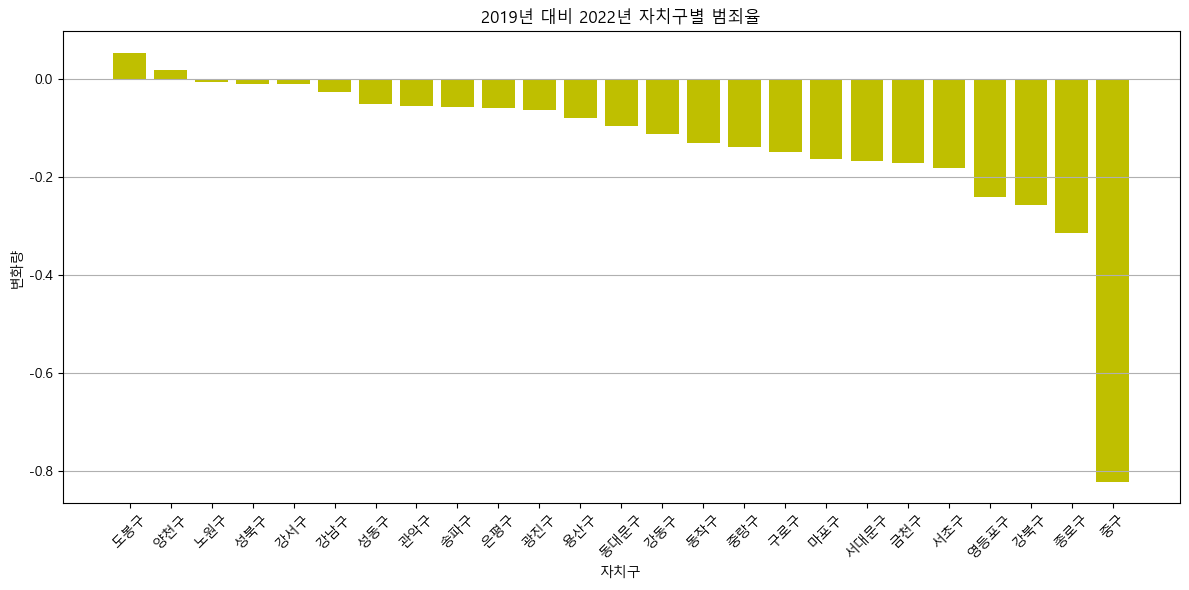

In [48]:
def delta_graph(df):
    df['변화량'] = (df['2022'] - df['2019'])

    df_sorted = df.sort_values(by='변화량', ascending=False)

    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted.index, df_sorted['변화량'], color='y')
    plt.title('2019년 대비 2022년 자치구별 범죄율')
    plt.xlabel('자치구')
    plt.ylabel('변화량')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    df.drop(['변화량'], axis=1, inplace=True)

delta_graph(crime_rate_df)

## 5개구 연도별 범죄율 그래프

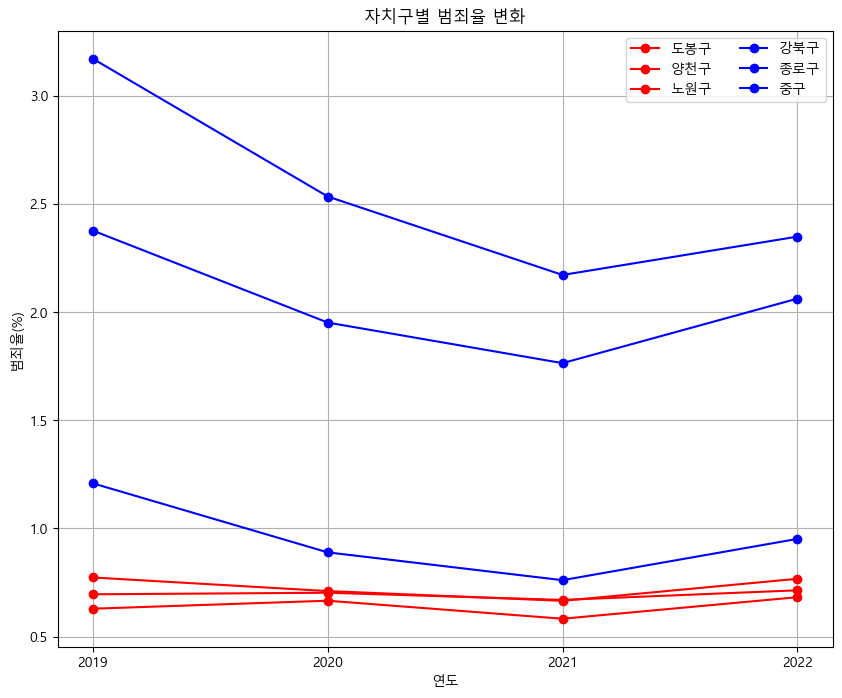

In [49]:
target_crime_rate_df = crime_rate_df.loc[['도봉구', '양천구', '노원구', '강북구', '종로구', '중구']]

colors = ['red', 'red', 'red', 'blue', 'blue', 'blue']
color_index = 0
# 그래프 사이즈 설정
plt.figure(figsize=(10, 8))

# DF의 인덱스와 값으로 라인그래프
for index, row in target_crime_rate_df.iterrows():
    plt.plot(target_crime_rate_df.columns, row, marker='o', label=index, color=colors[color_index])
    color_index += 1

plt.title('자치구별 범죄율 변화')
plt.xlabel('연도')
plt.ylabel('범죄율(%)')
plt.legend(loc='best', ncol=2)
plt.grid(True)

plt.show()

In [50]:
# 두 연도의 범죄율 차이 구하는 함수

def delta(x, y):
    return crime_rate_df[str(y)] - crime_rate_df[str(x)]

delta('2022', '2019')


# 두 연도의 범죄율 증감비 구하는 함수
def delta(x, y):
    return crime_rate_df[str(y)]/crime_rate_df[str(x)] -1 

delta('2022', '2019')

자치구
강남구     0.020612
강동구     0.139729
강북구     0.269940
강서구     0.014256
관악구     0.058025
광진구     0.060840
구로구     0.162180
금천구     0.161817
노원구     0.007858
도봉구    -0.078027
동대문구    0.105495
동작구     0.186963
마포구     0.150456
서대문구    0.225805
서초구     0.166737
성동구     0.068069
성북구     0.017196
송파구     0.073327
양천구    -0.025893
영등포구    0.198982
용산구     0.062417
은평구     0.080684
종로구     0.152494
중구      0.350114
중랑구     0.150830
dtype: float64